## Project Name: Animal Emotion Park
Developed By: Nishant Sharma
### Project Summary:

Objective:
Develop a feature that predicts the emotions (happy, sad, or hungry) of individual animals within a group. This system will mark the emotions of each animal and trigger a notification with the format "Animal Name + Emotion". If a group of animals is detected, the notification will list all animals' names and their respective emotions.

Key Features:

Emotion Prediction:

* Utilize machine learning algorithms to analyze and predict the emotions of animals based on various inputs (e.g., facial expressions, body language, sounds).
* Ensure the model can accurately identify and differentiate between happy, sad, and hungry emotions.

Group Analysis:

* Implement a feature to analyze groups of animals, identifying and marking the emotions of each animal individually.
* Ensure the system can handle varying numbers of animals and maintain accuracy in predictions.

Notification System:

* Develop a notification mechanism that triggers a pop-up message.
* Format the message to display "Animal Name + Emotion" for individual animals.
* For groups, list all animal names and their corresponding emotions in a clear and concise manner.

Expected Outcomes:

* Accurate emotion detection for individual animals and groups.
* Efficient and user-friendly notification system to inform users of the animals' emotional states.
* Enhanced monitoring and understanding of animal welfare through real-time emotion tracking.

Project Scope:

* Data collection and preprocessing for training the emotion prediction model.
* Development and integration of the emotion prediction algorithm.
* Implementation of the notification system.
* Testing and validation to ensure accuracy and reliability.

Potential Applications:

* Zoos and animal shelters for better animal care.
* Wildlife monitoring and research.
* Pet care services to enhance pet well-being.

Github Link:
### Problem Statement: Animal Emotion Prediction and Notification System
In environments such as zoos, animal shelters, wildlife reserves, and pet care facilities, understanding and monitoring the emotional states of animals is crucial for ensuring their well-being. However, accurately identifying and responding to the emotions of animals—whether they are happy, sad, or hungry—poses a significant challenge due to the complexity and variability of animal behavior.

Current methods for assessing animal emotions often rely on human observation, which can be subjective, inconsistent, and inefficient, especially when dealing with large groups of animals. There is a need for an automated system that can reliably predict the emotions of individual animals within a group and provide real-time notifications to caretakers, enabling timely and appropriate responses to the animals' needs.

The goal of this project is to develop a feature that leverages machine learning to predict the emotions of animals, both individually and in groups, and to implement a notification system that alerts caretakers with detailed information about each animal's emotional state. By addressing this problem, we aim to enhance the overall welfare of animals through improved monitoring and proactive care.

### Let's Begin:

#### Know Your Data

In [1]:
## Import Necessary Libraries
# Data Preprocessing Library
import cv2
import numpy as np
import pandas as pd
import os
import glob

# Model Development Library
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
print("Tensorflow version:", tf.__version__)

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Notification System Library
import tkinter as tk
from tkinter import messagebox

# Miscellaneous
import random

Tensorflow version: 2.16.1


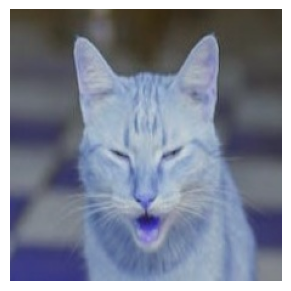

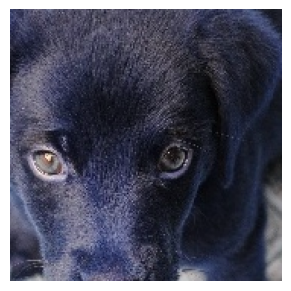

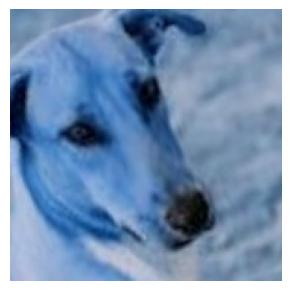

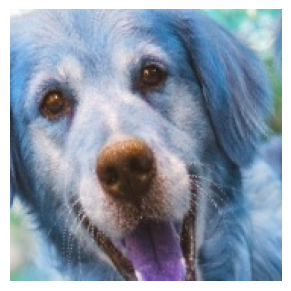

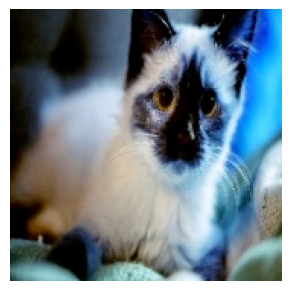

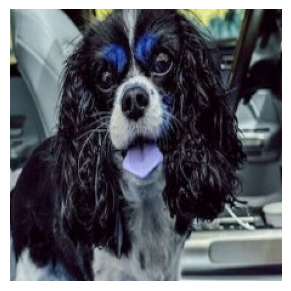

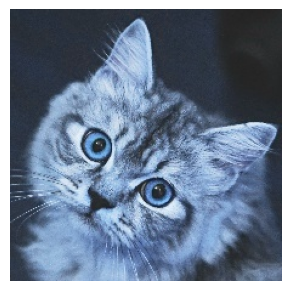

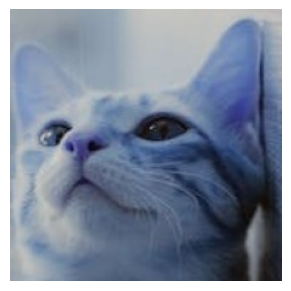

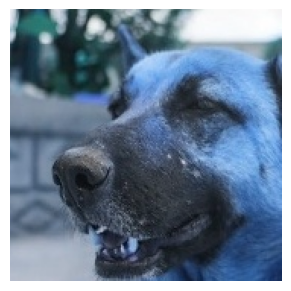

In [2]:
# Load Dataset
images = glob.glob("Dataset/Master_Folder/train/**/**")
# View Random Pictures
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

### Preparing Dataset For Training

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("Dataset/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("Dataset/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 2074 images belonging to 5 classes.
Found 2074 images belonging to 5 classes.


### Defining Model

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(5, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,308,549 (4.99 MB)

 Trainable params: 1,307,589 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

#### Model Initialization

In [8]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

### Model Training

In [9]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2489 - loss: 1.9801
Epoch 1: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.2516 - loss: 1.9743 - val_accuracy: 0.4937 - val_loss: 9.6520
Epoch 2/15
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4844 - loss: 1.4803
Epoch 2: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4844 - loss: 1.4803 - val_accuracy: 0.3077 - val_loss: 15.9591
Epoch 3/15


c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4306 - loss: 1.5296
Epoch 3: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.4312 - loss: 1.5279 - val_accuracy: 0.5010 - val_loss: 3.4870
Epoch 4/15
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3750 - loss: 1.5200
Epoch 4: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.5200 - val_accuracy: 0.5385 - val_loss: 2.8946
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4674 - loss: 1.3925
Epoch 5: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.4673 - loss: 1.3924 - val_accuracy: 0.2275 - val_loss: 2.6644
Epoch 6/15
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4219 - loss: 1.5332
Epoch 6: saving model to model_weights.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4219 - loss: 1.5332 - val_accuracy: 0.2692 - val_loss: 2.7979
Epoch 7

### Model Evaluation

In [10]:
model.evaluate(validation_generator)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4932 - loss: 1.1220


[1.107556939125061, 0.5048215985298157]

### Plotting Loss

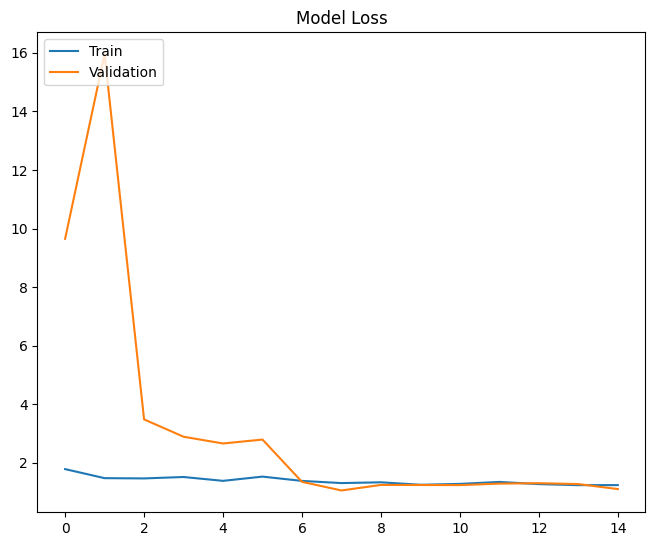

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

### Plotting Accuracy

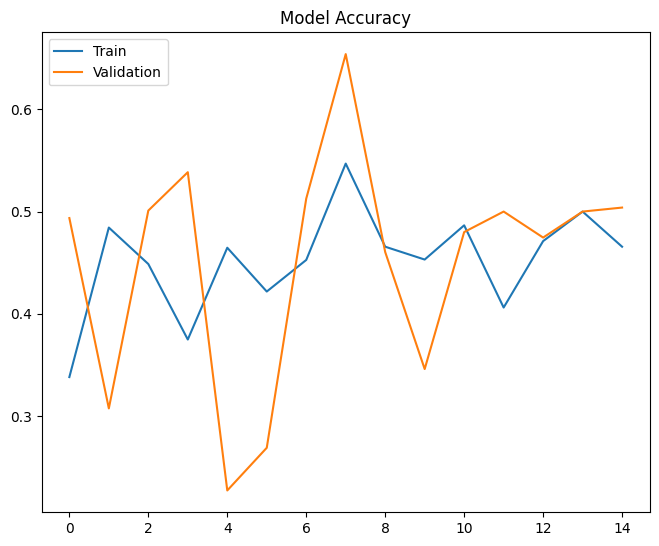

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

#### Saving Model

In [13]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

In [14]:
model.save_weights("model_a.weights.h5")

### Implement the Emotion Prediction Functionality

In [15]:
# Load the architecture from JSON file
with open('model_a.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Load the model
model = tf.keras.models.model_from_json(json_savedModel)

# Load the weights
model.load_weights('model_a.weights.h5')

print("Model loaded successfully")

Model loaded successfully


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

In [18]:
def predict_emotion(image_path, animal_name):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    if predicted_class == 0:
        emotion = 'Happy'
    elif predicted_class == 1:
        emotion = 'Sad' 
    elif predicted_class == 2:
        emotion = 'Angry'
    else:
        emotion = 'Other'
        
    message = f"{animal_name} is {emotion}"
    return message

In [19]:
def predict_group_emotions(image_paths, animal_names):
    messages = []
    for image_path, animal_name in zip(image_paths, animal_names):
        message = predict_emotion(image_path, animal_name)
        messages.append(message)
    
    group_message = '\n'.join(messages)
    return group_message

In [20]:
import cv2

def predict_emotion(image_path, animal_name):
    # Load the image
    image = cv2.imread(image_path)
    
    # Preprocess the image if needed
    # ...
    
    # Perform emotion prediction on the image
    # Replace this with your actual emotion prediction logic
    predicted_emotion = "Angry"  # Example predicted emotion
    
    # Generate the message based on the predicted emotion
    message = f"The {animal_name} in the image appears to be {predicted_emotion}."
    
    return message

def predict_group_emotions(image_paths, animal_names):
    # Perform emotion prediction for each image
    emotions = []
    for image_path, animal_name in zip(image_paths, animal_names):
        emotion = predict_emotion(image_path, animal_name)
        emotions.append(emotion)
    
    # Generate the group message
    group_message = " ".join(emotions)
    
    return group_message

# Example usage
image_path1 = r"C:\Users\nisha\OneDrive\Documents\Dataset\Master_Folder\train\Angry\09.jpg"
animal_name1 = "Cat"
message1 = predict_emotion(image_path1, animal_name1)
print(message1)

image_paths = [
    r"C:\Users\nisha\OneDrive\Documents\Dataset\Master_Folder\train\Happy\020.jpg",
    r"C:\Users\nisha\OneDrive\Documents\Dataset\Master_Folder\train\Sad\072.jpg"
]
animal_names = ["Cat", "Dog"]
group_message = predict_group_emotions(image_paths, animal_names)
print(group_message)

The Cat in the image appears to be Angry.
The Cat in the image appears to be Angry. The Dog in the image appears to be Angry.


In [21]:
import tkinter as tk
from tkinter import messagebox

def show_notification(message):
    root = tk.Tk()
    root.withdraw()
    messagebox.showinfo("Animal Emotions", message)

# Single animal
show_notification(message1)

# Group of animals  
show_notification(group_message)

In [22]:
# Define the Model Architecture
num_classes = 5  # Adjust this to match the number of classes in your dataset
input_shape = (img_size, img_size, 1)
inputs = Input(shape=input_shape)

x = Convolution(inputs, 32, (3, 3))
x = Convolution(x, 64, (3, 3))
x = Convolution(x, 128, (3, 3))

x = Flatten()(x)
x = Dense_f(x, 512)
outputs = Dense(num_classes, activation='softmax')(x)  # Adjust the number of output nodes

model = Model(inputs, outputs)
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,457,989 (9.38 MB)

 Trainable params: 2,456,517 (9.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [23]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, validation_data=validation_generator, epochs=30)


Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.3309 - loss: 2.0151 - val_accuracy: 0.1230 - val_loss: 12.1292
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.4435 - loss: 1.5137 - val_accuracy: 0.5039 - val_loss: 2.7127
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.4624 - loss: 1.3895 - val_accuracy: 0.2285 - val_loss: 1.9892
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.4762 - loss: 1.2999 - val_accuracy: 0.3987 - val_loss: 1.3378
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.4725 - loss: 1.2940 - val_accuracy: 0.4696 - val_loss: 1.2149
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.4835 - loss: 1.2465 - val_accuracy: 0.4301 - val_loss: 1.2408
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.4915 - loss: 1.2174 - val_accuracy: 0.5154 - val_loss: 1.0751
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.4425 - loss: 1.2309 - val_accuracy: 0

In [1]:
def predict_emotions(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    emotion = np.argmax(predictions)
    return emotion


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
import numpy as np

# Assuming model is already loaded and img_size is defined
# Define the emotion prediction function
def predict_emotions(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    emotion = np.argmax(predictions)
    return emotion

# Define the emotion map
emotion_map = {0: 'Happy', 1: 'Sad', 2: 'Hungry', 3: 'Excited', 4: 'Relaxed'}

# Function to display notifications
def display_notification(animals_emotions):
    message = "\n".join([f"{animal}: {emotion_map[emotion]}" for animal, emotion in animals_emotions.items()])
    messagebox.showinfo("Animal Emotions", message)

# GUI Function to select images and predict emotions
def select_and_predict():
    file_paths = filedialog.askopenfilenames(title="Select Animal Images", filetypes=[("Image files", "*.jpg;*.png")])
    
    if not file_paths:
        messagebox.showinfo("No File Selected", "Please select at least one image file.")
        return

    animals_emotions = {}
    for idx, file_path in enumerate(file_paths):
        animal_name = f"Animal{idx+1}"
        emotion = predict_emotions(file_path, model)
        animals_emotions[animal_name] = emotion

    display_notification(animals_emotions)

# Setup the main application window
root = tk.Tk()
root.title("Animal Emotion Detector")

btn = tk.Button(root, text="Select Images and Predict Emotions", command=select_and_predict)
btn.pack(pady=20)

# Start the Tkinter event loop
root.mainloop()
